In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline


In [2]:
df = pd.read_excel("Patient_Dataset_KMeans.xlsx")
df.head()

,Patient_ID,Age,Gender,BMI,Blood_Pressure,Glucose_Level,Has_Diabetes,Has_Stroke,Has_Asthma
0,1,50,Female,23.8,155,120,1,1,1
1,2,79,Female,33.5,140,103,0,1,1
2,3,90,Male,24.6,171,136,1,1,0
3,4,38,Female,37.8,91,125,0,0,0
4,5,40,Female,26.8,112,130,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prétraitement des données
# Suppression des colonnes inutiles pour l'analyse
columns_to_use = ['Age', 'BMI', 'Blood_Pressure', 'Glucose_Level', 'Has_Diabetes', 'Has_Stroke', 'Has_Asthma']
data_for_pca = df[columns_to_use]
data_for_pca
# Normalisation des données numériques
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data_for_pca)


,Age,BMI,Blood_Pressure,Glucose_Level,Has_Diabetes,Has_Stroke,Has_Asthma
0,50,23.8,155,120,1,1,1
1,79,33.5,140,103,0,1,1
2,90,24.6,171,136,1,1,0
3,38,37.8,91,125,0,0,0
4,40,26.8,112,130,0,0,0
...,...,...,...,...,...,...,...
195,62,36.2,113,175,0,0,1
196,78,27.7,126,195,0,0,1
197,59,26.7,116,86,0,1,1
198,60,20.6,179,70,0,1,1


In [4]:
# Normalisation des données numériques
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

In [ ]:
# Application de la PCA
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour visualisation
principal_components = pca.fit_transform(scaled_data)

In [ ]:
import pandas as pd
from fanalysis.pca import PCA
%matplotlib inline

In [ ]:
#Demander une ACP normée
acp = PCA(std_unit=True, row_labels=df.index, col_labels=data_for_pca.columns)
# acp à partir de la matrice numpy
# On estime le modèle en appliquant la méthode fit de la classe PCA sur le jeu de données.
acp.fit(data_for_pca.values)

PCA(col_labels=Index(['Age', 'BMI', 'Blood_Pressure', 'Glucose_Level', 'Has_Diabetes',
       'Has_Stroke', 'Has_Asthma'],
      dtype='object'),
    row_labels=RangeIndex(start=0, stop=200, step=1))

In [ ]:
# Affichage des valeurs propres
acp.eig_

array([[  1.25012411,   1.23625054,   1.0756788 ,   0.97350542,
          0.91300598,   0.80190657,   0.74952857],
       [ 17.85891585,  17.66072201,  15.36684002,  13.90722033,
         13.04294254,  11.45580819,  10.70755105],
       [ 17.85891585,  35.51963786,  50.88647788,  64.79369822,
         77.83664075,  89.29244895, 100.        ]])

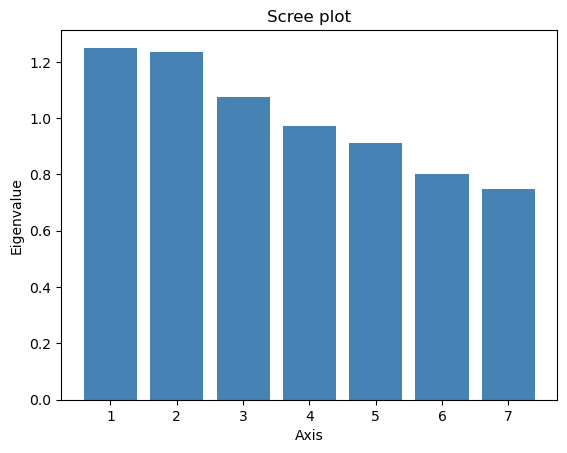

In [ ]:
acp.plot_eigenvalues()

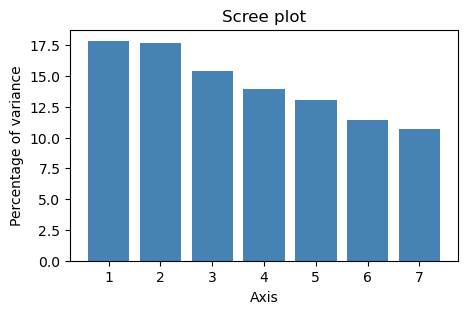

In [ ]:
acp.plot_eigenvalues(type="percentage", figsize=(5,3))

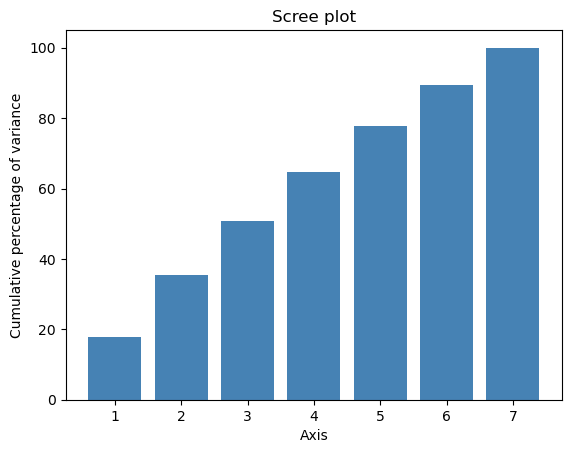

In [ ]:
acp.plot_eigenvalues(type="cumulative")

In [ ]:
info_var=acp.col_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7',
       'col_contrib_dim1', 'col_contrib_dim2', 'col_contrib_dim3',
       'col_contrib_dim4', 'col_contrib_dim5', 'col_contrib_dim6',
       'col_contrib_dim7', 'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3',
       'col_cos2_dim4', 'col_cos2_dim5', 'col_cos2_dim6', 'col_cos2_dim7'],
      dtype='object')

In [ ]:
# Coordonées des variables sur les 2 premiers axes
info_var[['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4','col_coord_dim5', 'col_coord_dim6']]

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6
Age,0.689392,-0.154877,0.304664,-0.037891,0.307915,-0.283927
BMI,-0.427239,0.018094,0.584196,0.518340,-0.241777,0.150987
Blood_Pressure,-0.203367,0.688054,0.050363,-0.207640,-0.275864,-0.596067
Glucose_Level,0.594175,-0.060563,0.401269,0.035286,-0.571805,0.008508
Has_Diabetes,0.050813,-0.468678,-0.586739,0.180312,-0.521825,-0.189162
Has_Stroke,0.353975,0.628472,-0.246928,-0.092739,-0.183579,0.529183
Has_Asthma,-0.264666,-0.346719,0.269786,-0.786080,-0.225108,0.165256


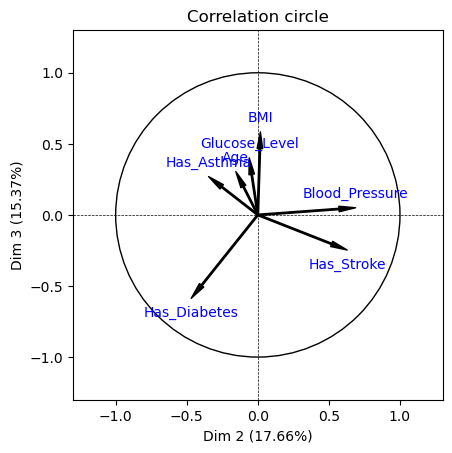

In [ ]:
# Cercle de corrélation
acp.correlation_circle(num_x_axis=2, num_y_axis=3)
# Nous avons l'effet taille

In [ ]:
# Coordonnées et autres informations
info_indiv=acp.row_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7',
       'col_contrib_dim1', 'col_contrib_dim2', 'col_contrib_dim3',
       'col_contrib_dim4', 'col_contrib_dim5', 'col_contrib_dim6',
       'col_contrib_dim7', 'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3',
       'col_cos2_dim4', 'col_cos2_dim5', 'col_cos2_dim6', 'col_cos2_dim7'],
      dtype='object')

In [ ]:
# Coordonées des individus sur les 2 premiers axes
info_indiv[['row_coord_dim1','row_coord_dim2']]

,row_coord_dim1,row_coord_dim2
0,0.043596,0.258220
1,0.171927,0.585219
2,1.843443,0.963325
3,-0.875544,-0.823599
4,-0.252024,-0.368290
...,...,...
195,0.039101,-1.168714
196,1.223913,-1.020262
197,-0.130832,0.159167
198,-0.412144,1.671489


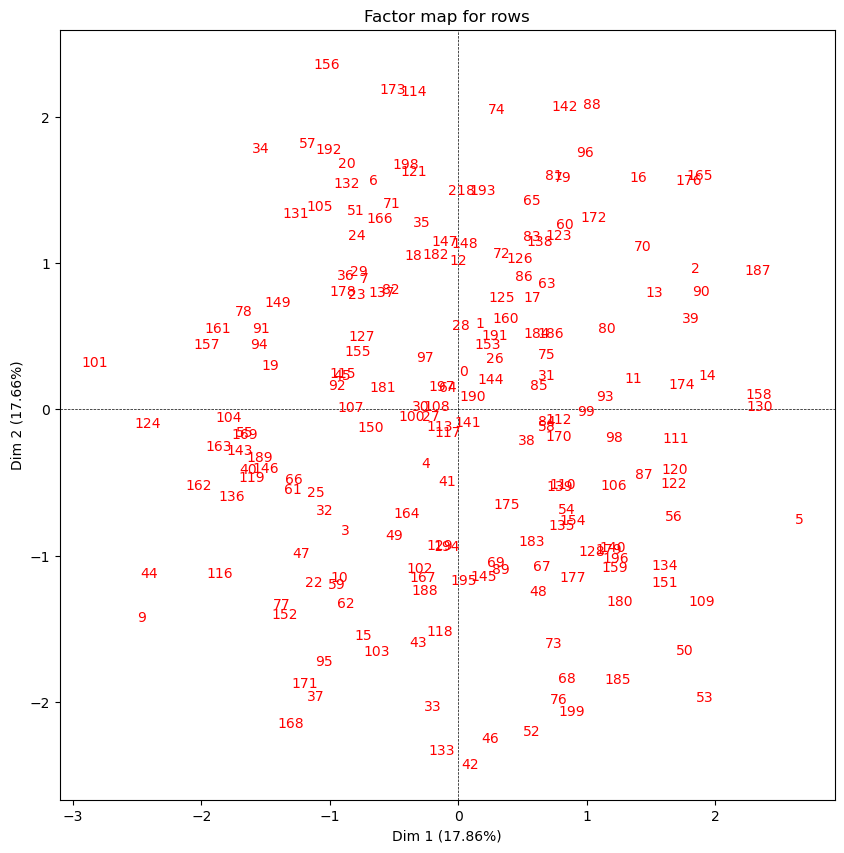

In [ ]:
#carte des individus
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(10,10))

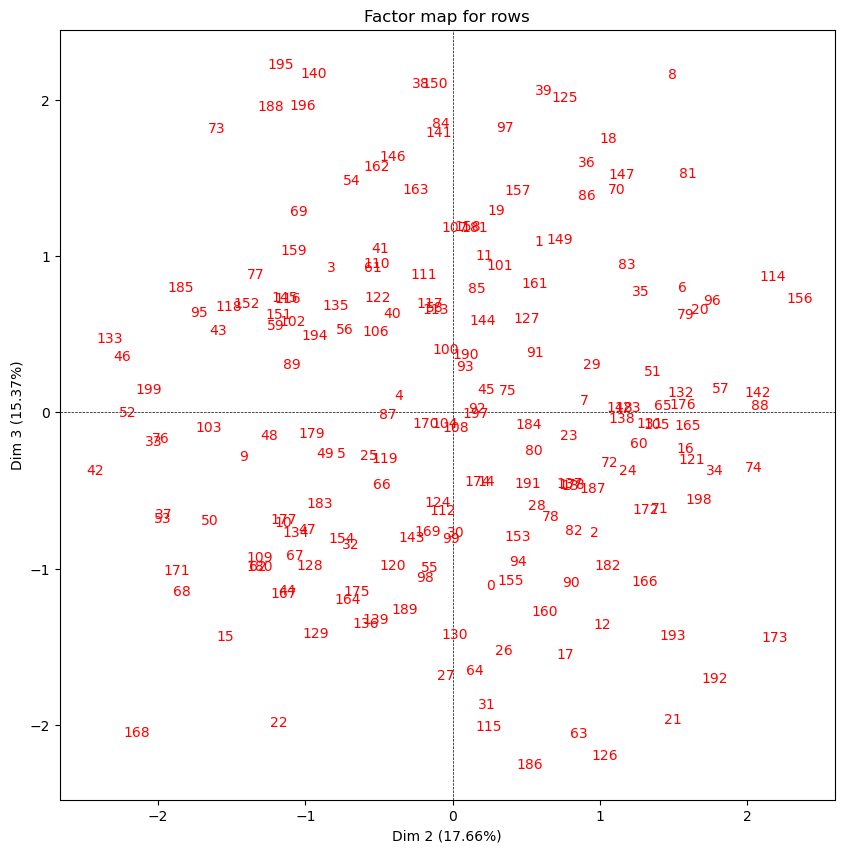

In [ ]:
#carte des individus
acp.mapping_row(num_x_axis=2,num_y_axis=3,figsize=(10,10))

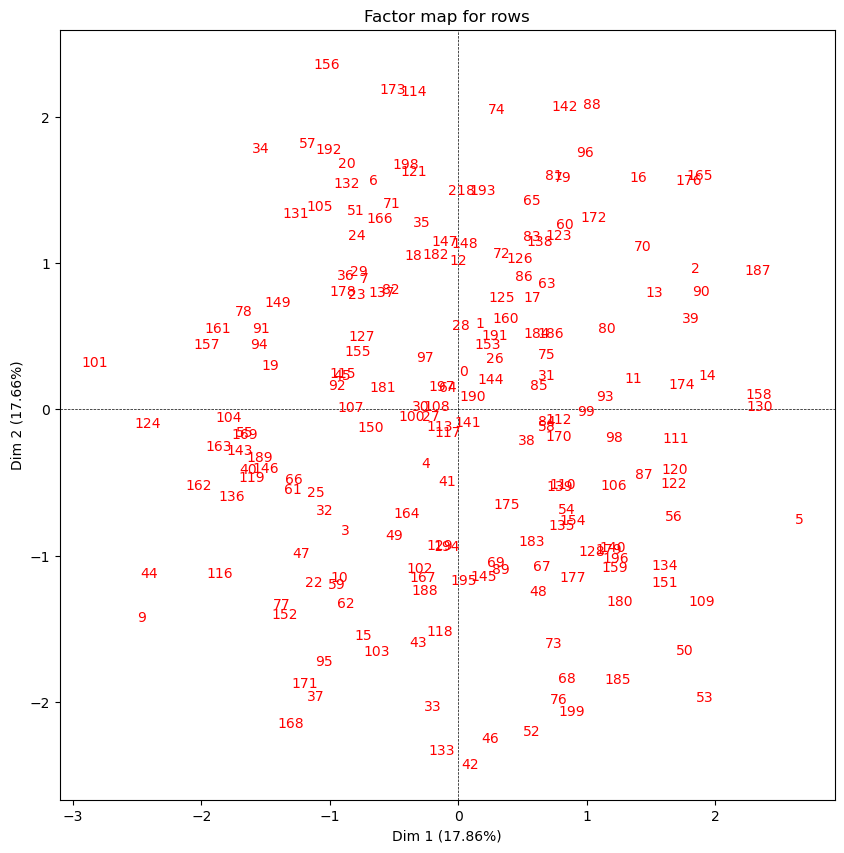

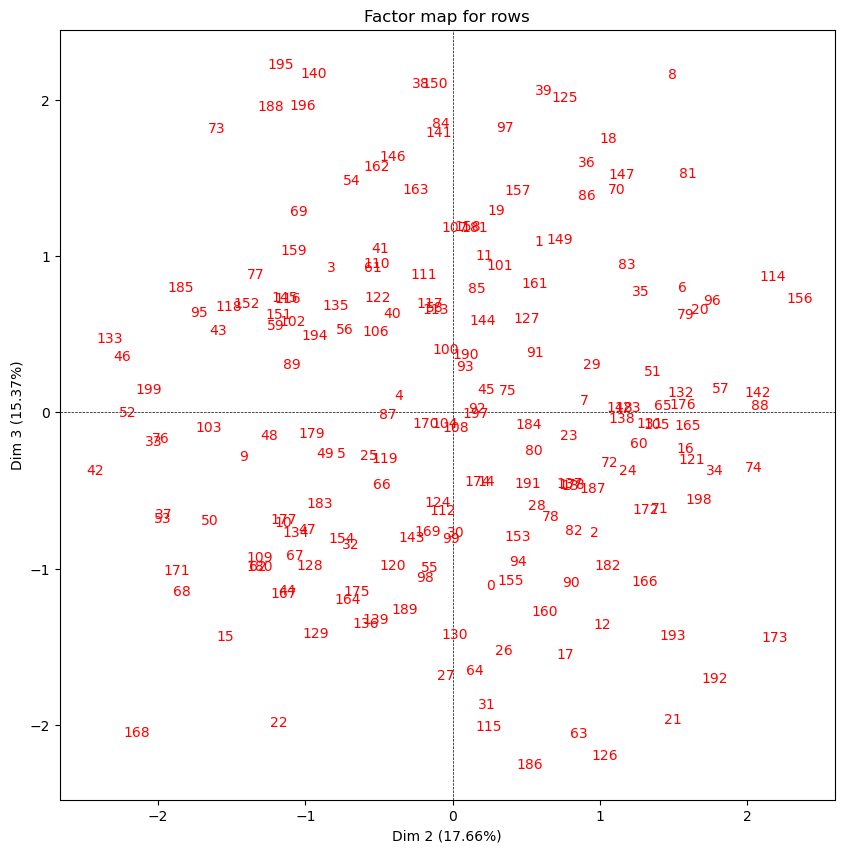

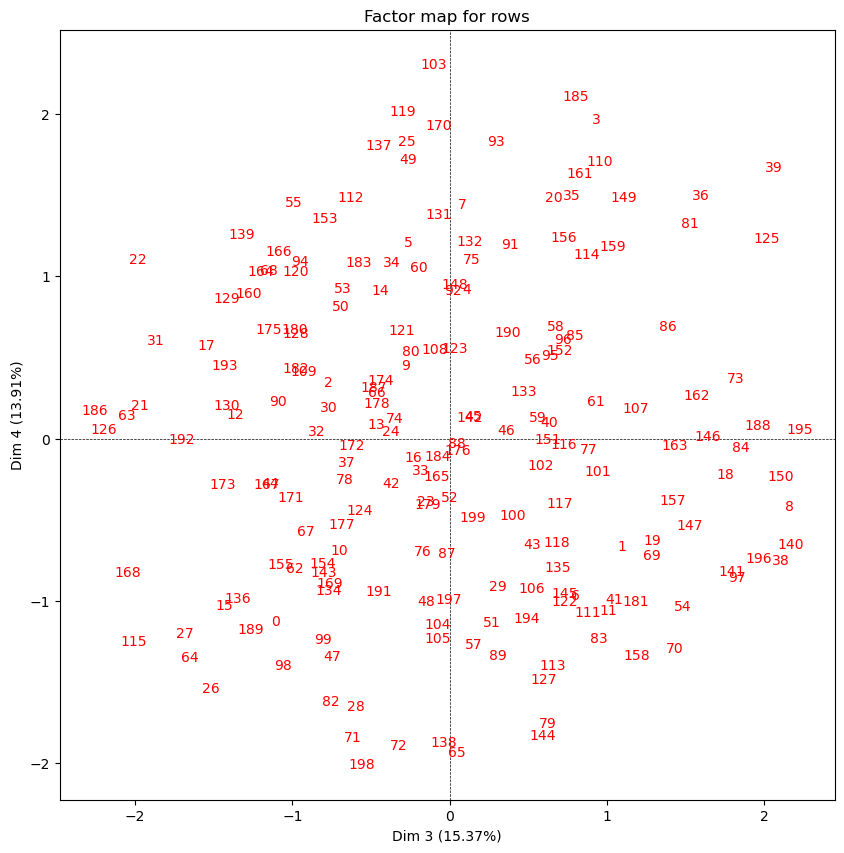

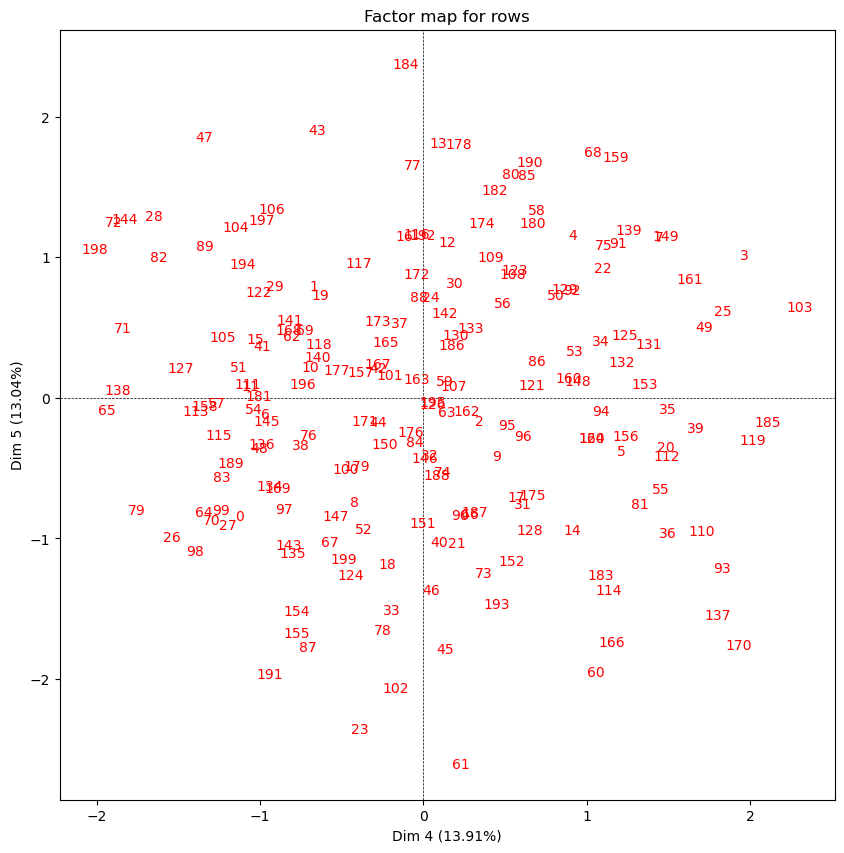

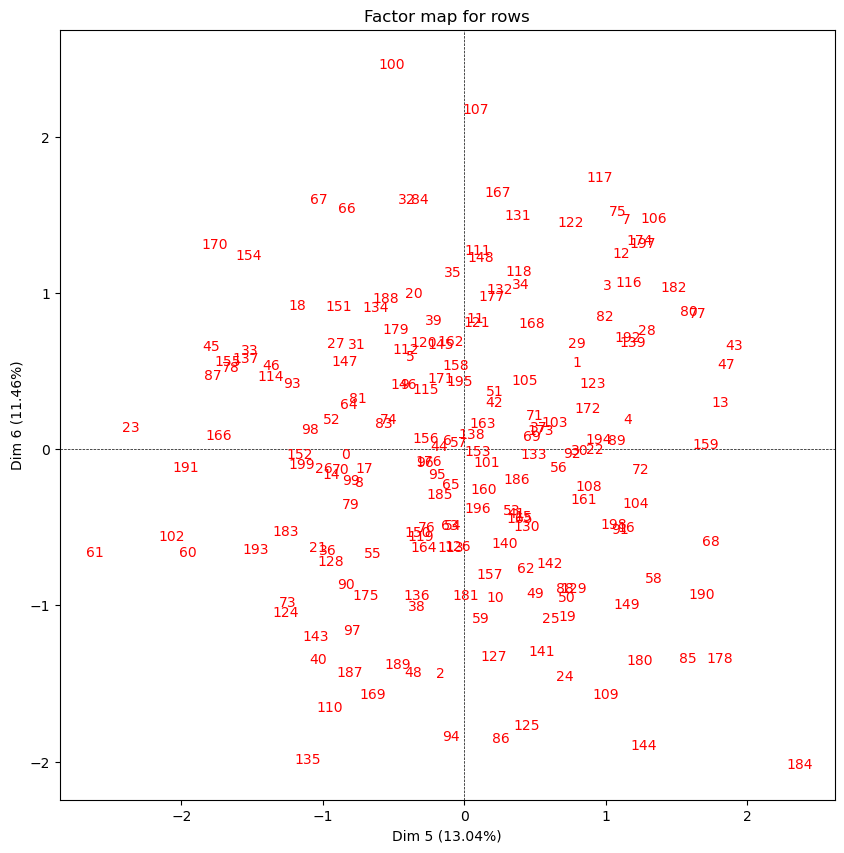

In [ ]:
#carte des individus
for i in range(1, 6):
    acp.mapping_row(num_x_axis=i,num_y_axis=i+1,figsize=(10,10))

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

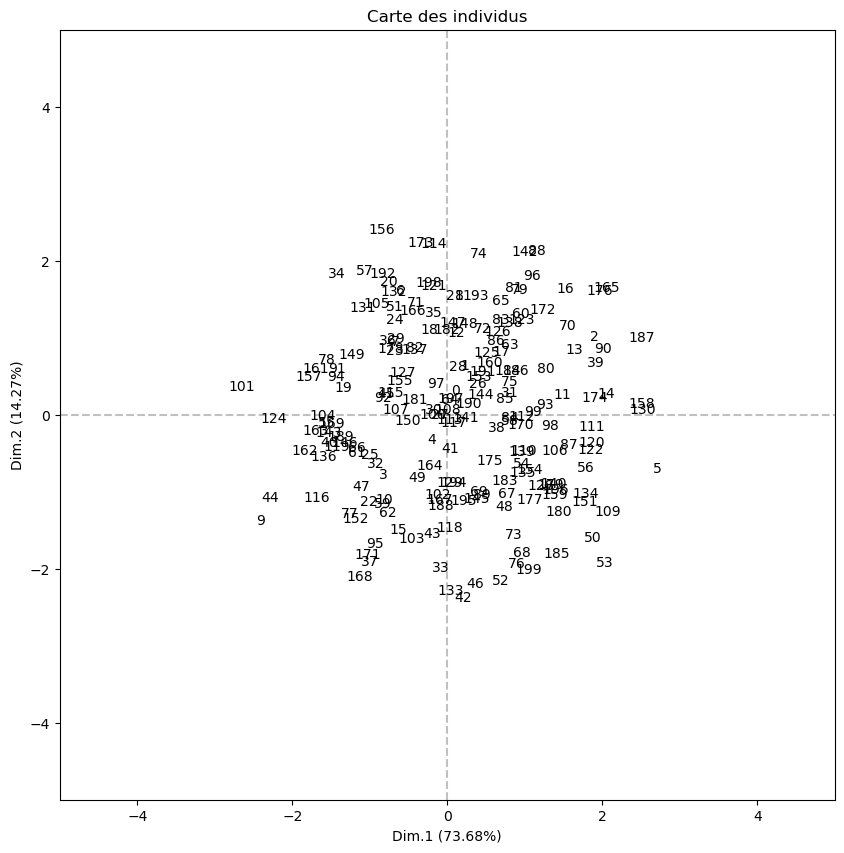

In [ ]:
import matplotlib.pyplot as plt
coord= info_indiv[['row_coord_dim1','row_coord_dim2']]
#graphique avec les échelles carrées
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (73.68%)")
ax.set_ylabel("Dim.2 (14.27%)")
plt.title("Carte des individus")
for i in range(coord.shape[0]):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],coord.index[i])

plt.show()

In [ ]:
# Application de la PCA
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour visualisation
principal_components = pca.fit_transform(scaled_data)